<img src="https://docs.google.com/uc?export=download&id=1EiHSYfHYk8nKMEWd6A74CMFVak5Lf4ab">
# Unsupervised Learning: Dimensionality Reduction

>[Unsupervised Learning: Dimensionality Reduction](#scrollTo=b9q-VxEW5tRs)

>[1- Dimensionality Reduction](#scrollTo=1oBho425Q7ca)

>>[Obejective](#scrollTo=yLvtrsm0RcWq)

>>[Projection](#scrollTo=A8DvRRWlRdGi)

>>[Manifold](#scrollTo=OjzIaOe1RdZ2)

>[2- Some Math](#scrollTo=VL49qQMiRCfC)

>>[Singular Value Decomposition](#scrollTo=QtI6YjSJRzo8)

>>[Eigenvectors, eigen values](#scrollTo=Tg2exEipRz7w)

>>[Standard Deviation](#scrollTo=lYnbKQUdR0Ou)

>[3-  PCA](#scrollTo=Nhm8OJc_RFU8)

>>[Definition](#scrollTo=TOgMnI_CR7QE)

>>[Example](#scrollTo=iJCObGCDR7Wk)

>>[Results](#scrollTo=Zd06of0ZR7JC)

>[4- PCA  with matplotlib and sklearn](#scrollTo=Ca8Ofrs7RHwC)

>>[With matplotlib](#scrollTo=xn8bZSmqSBwY)

>>[With sklearn](#scrollTo=157T7zEfSB_u)

>>[Explained variance ratio](#scrollTo=ArfuFPFFSB4a)

>[5- Manifold Learning: LLE](#scrollTo=5aXVjrUrRNGi)

>>[Concept](#scrollTo=H71qigLHSGU2)

>>[Example](#scrollTo=yMgLDZAdSGjG)

>[6- 5- Manifold Learning: MDS](#scrollTo=CffbTqAERQKg)

>>[Concept](#scrollTo=23ma5K3xSKrS)

>>[Example](#scrollTo=WIGdB_nfSK9o)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- Dimensionality Reduction

## Obejective
* **Dimensionality reduction** in **machine learning** is reducing the **number** of **features** of the training dataset.

* This reduction is necessary to:
 * Eliminate the **noise** from the data
 * Visualize the data in **2 ** or **3** dimensions
 * Speed up the learning process
 * Enhance the learning results by eliminating correlated features.
 * Eliminate unnecessary features.
 * Compress the data size.

* Two main approaches to dimensionality redcution are:
 * **Projection** : project the data into a lower dimensional space.
 * **Manifold**: suppose that the data in the higher dimension is just a manifold of a representation of the data in the lower dimension.


## Projection
* Sometimes the  degree of the variation of the data is different from one dimension to an other. So, for some features, the values can be very diverse, an for others, they can barely change.
 
* So we project the data into a lower dimension in order to keep only the most influential **information** $\rightarrow$ we define a mapping between the original data from the higher dimension to new data in a lower dimension. 


* The most used technique to define this mapping, is **PCA** (**P**rincipal **C**omponent **A**nalysis) and its variations:
  * Incremental PCA
  * Randomized PCA
  * Kernel PCA

## Manifold
* Like we said earlier, we make the hypothesis that our data is created from a **manifold** of a data in a **lower dimension**. So, reducing it to this low dimension is like **straightening up** this manifold (or **unrolling it**). 

* The different techniques used, are:
  * **MDS**: Multidimensional Scaling. Tries to preserve the distances between instances.
  * **LLE**: Locally Linear Embedding. Tries to preserve the relationship between a sample and its closets points.
  * **Isomap**: The samples will represent nodes of a graph. These nodes are connected to their closets neighbors. The algorithm tries to preserve the number of nodes in the shortest path connecting two nodes.

# 2- Some Math

## Singular Value Decomposition

* It is the the decomposition of a matrix $M (m,n)$ into ** 3**  matrices:  $U_{(m,m)}$, $ S_{(m,n)}$, and $V_{(n,n)}$  . Considering only **real** values, we have the following characteristics:

  * $M = U \cdot S \cdot V^T $ ( $V^T$ is the transpose matrix of $V$)
  * $U \cdot U^T = U^T \cdot U = I(m,m)$ (the identity matrix)
  * $V \cdot V^T  = V^T \cdot V = I (n,n)$
  * The diagonal (values with the same row and column indices) of $S$ are the **Singular values** of $M$
    * Singular values are the square roots of **eigenvalues**
    * The other values of $S$ are ** zeros**.
  * The columns of $U$ are the **eigenvectors** of$ M \cdot M^T$ . 
  * The columns of $V$ are the **eigenvectors** of $M^T \cdot  M $.


## Eigenvectors, eigen values


* Given$ A_{(n,n)}$  a square matrix:
  * If $ A \cdot V(n) =     . V(n)$  then: V is an eigenvector and    is its corresponding eigenvalue.
  * The above equation can be rewritten as follow: $(A-   I)\cdot V= 0$
  * Several    $\lambda$  can solve the equation. For each  $\lambda$ value, an eigenvector is computed.

* Example:
   * If  $A =  \begin{pmatrix} 2 & 1  \\ 1 & 2\end{pmatrix}$
   
    * its eigenvalues wil be: 1, 3
    * their corresponding eigenvectors will be:  $\begin{pmatrix}~~ 1 \\ -1  \end{pmatrix}$     and $\begin{pmatrix} 1 \\1  \end{pmatrix}$


## Standard Deviation
* The standard deviation  $\sigma$   measures how data is spread (or distant from the mean) . It is the **square root** of the variance.

* The variance is computed as follow:
  * $variance = \sum_{ i=1 }^{ N } \frac{ (x_i - \mu)^2}  {N }$


* And  $\sigma = \sqrt{ variance }$

* To project data on new axis, we select the axis that preserve the maximum possible variance of the data. This way, most of the information is preserved. 

# 3-  PCA

## Definition

* It is a linear dimensionality reduction technique that project data using orthogonal axes (components)  that preserve the maximum variance possible. One of the method used is singular value decomposition of the mean centered training data.

* As stated before the decomposition leads to 3 matrices. The vectors of the matrix $V^T$ will be used to project the data. They are the “principal components”.

* Each component will conserve a certain amount of variance. The variance obtained after projection is the accumulation of the variances obtained by each component 

* To project, we select a sufficient number of component to preserve the maximum of variance, then we apply the transformation (the projection), using only this number of vectors.
* The number of vectors will determine the dimension of the projection. 

## Example

In [0]:
# import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
import sklearn.preprocessing as preprocess

In [0]:
# loading the data ( 4 feautres ==> 4 dimensions)
myIris = load_iris()
X= myIris.data
y= myIris.target


In [0]:
from numpy import mean
# centring the data
X_centred = preprocess.scale(X,with_std=False, axis=0)

X_centred = X - X.mean(axis=0)
# extracting the principal component

U, s, V = np.linalg.svd(X_centred)
# extracting  the 3 first principal commponets
c1 = V.T[:,0]# V.T is the transopose of V
c2 = V.T[:,1]
c3 = V.T[:,2]


In [0]:
# compute the projection in a 3D dimension
C3 = V.T[:, :3]
X3d = X_centred.dot(C3)
# compute the projection in a 2D dimension
C2 = V.T[:, :2]
X2d = X_centred.dot(C2)


## Results

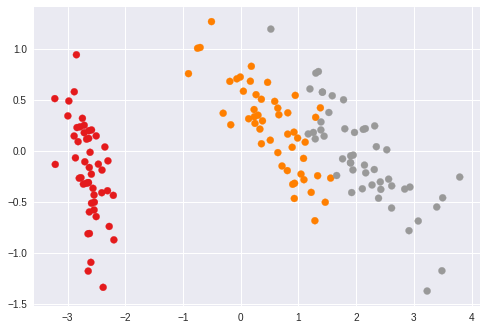

In [104]:

import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(X2d[:,0],X2d[:,1],c=y, cmap = plt.cm.Set1)


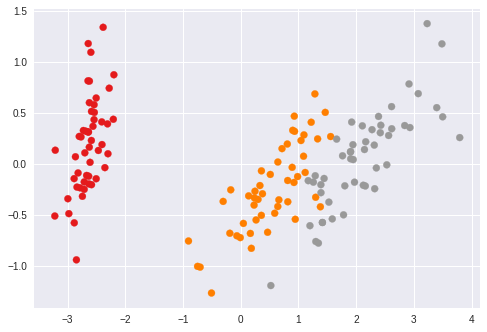

In [108]:
# results with signs flip as in sklearn
from sklearn.utils.extmath import fast_logdet, randomized_svd, svd_flip

U, S, V = np.linalg.svd(X_centred, full_matrices=False)
U2, V2 = svd_flip(U, V)
C2_2 = V2.T[:, :2]

X2d_wf  = X_centred.dot(C2_2)
plt.scatter(X2d_wf[:,0],X2d_wf[:,1],c=y, cmap = plt.cm.Set1)



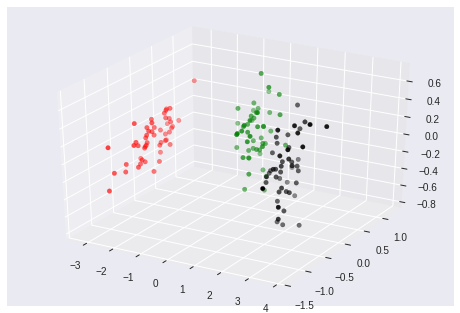

In [116]:
# visualize the resulting 3D projection (without svd_flip)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')
# for visualization purpose we will affect the same
# color for each class
princ_colors = ["red","green","black"]
colors= [princ_colors[i] for i in y]
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=colors, marker='o')
plt.show()


# 4- PCA  with matplotlib and sklearn

## With matplotlib

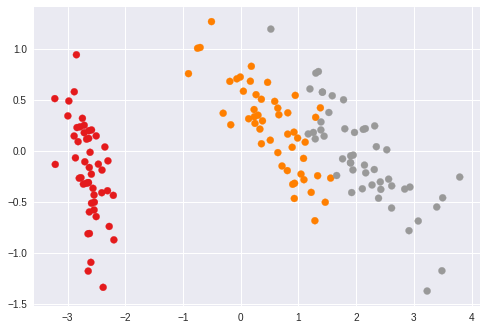

In [72]:
# we are using matplotlib version 2.1.2
# it will be removed in version 3.1
from matplotlib.mlab import PCA as PCA2
my2PCA = PCA2(X, standardize=False)
results = my2PCA.project(X, minfrac=0.02)
fig = plt.figure()
plt.scatter(results[:,0],results[:,1],c=y, cmap = plt.cm.Set1)




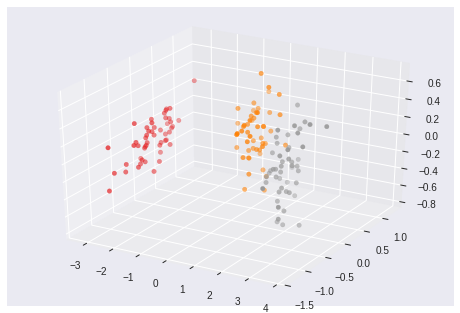

In [76]:
# to obtain all the componenets, we set minfrac=0
results2 = my2PCA.project(X, minfrac=0.0)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(results2[:,0], results2[:,1], results2[:,2], c=y, cmap="Set1",marker='o')
plt.show()

## With sklearn

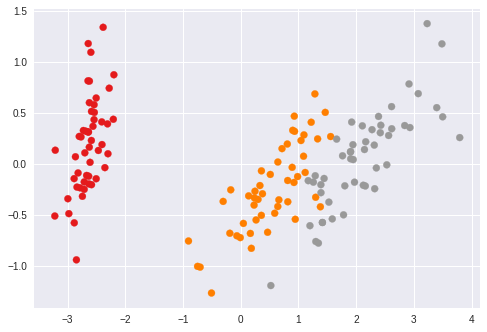

In [129]:
from sklearn.decomposition import PCA

fig = plt.figure()
pca = PCA(n_components = 2)
pca.fit(X)
X2d_2= pca.transform(X)


plt.scatter(X2d_2[:,0],X2d_2[:,1],c=y, cmap = plt.cm.Set1)

In [0]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 3)
pca3.fit(X)
X3d_2= pca3.transform(X)


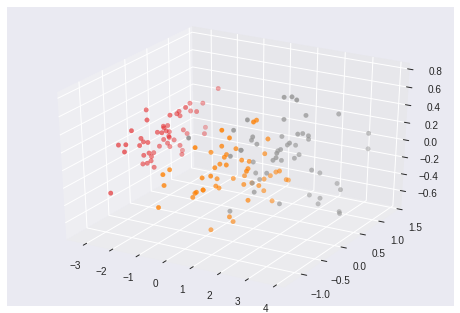

In [125]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# for visualization purpose we will affect the same
# color for each class
princ_colors = ["red","green","black"]
colors= [princ_colors[i] for i in y]
ax.scatter(X3d_2[:,0], X3d_2[:,1], X3d_2[:,2], c=y, cmap="Set1",marker='o')
plt.show()


## Explained variance ratio

* The **correct number **of **components** can be defined by the **explained variance ratio** of each component.
* It is computed by the value of **explained variance** divided by the **sum of all variances**.
* The ratio of each component are **summed up **until a certain percentage is obtained.
* The **variances** can be computed from the **square** of the **singular values **in **S**.

In [121]:
# the explained variance ratio (our implementation, 2D)

explained_ratio_2FirstC = (np.square(s[0])+ np.square(s[1]))/np.sum(np.square(s))

explained_ratio_2FirstC 


0.9776852063187949

In [128]:
# explained variance_ratio (with  matplotlib, 2D)
EVR2= my2PCA.fracs[0] + my2PCA.fracs[1]
EVR2

0.977685206318795

In [130]:
# explained variance_ratio (with sklearn, 2D)
EVR2= np.sum(pca.explained_variance_ratio_)
EVR2

0.977685206318795

# 5- Manifold Learning: LLE

## Concept


* **LLE** for **L**ocally **L**inear **E**mbeeding. The algorithm consist of **3** major steps:
* **Step 1 - identifying the neighbors for each sample $x_i$ from the data $X_{(N,D)}$(for N samples and D features) :** 
  * Compute the distances of the other samples from $x_i$
  * Select the $k$ smallest distances.
* **Step 2 - for each sample xi compute its neighbors weights:**
  * Create the matrix $Z_{(k,D)}$ with the $k$ samples rows from $X_{(N,D)}$ corresponding to the neighbors  of $x_i$
  * Subtract $x_i$ values from each row of $Z_{(k,D)}$
  * Compute$ C_{(k,k)} = Z_{(k,D)} \cdot Z^T_{(D,k)}$[in the original page it is inverted because of $X$ and $Z$ are transposed](https://cs.nyu.edu/~roweis/lle/algorithm.html)
  * Compute the row $i$ of the matrix $W_{(N,N)}$  with:
    * Compute the weights in the one column vector$ w_{(k,1)}$ that solve the equation $C_{(k,k)} \cdot w_{(k,1)} = 1_{(k,1)}$ (1 is a column vector with only 1 as values)

    * For the samples $j$ that do not belong to each $x_i$, neighbors, set the weights to$ 0$.
    * For each neighbor$ b$  of$ x_i$ set the weight to:  $\frac{w(p)}{sum(w_{(k,1)})}$. 
    > Where $p$ is the index in $w$  corresponding to the $b$ neighbor of $x_i$.
    
* **Step 3 – reduce the dimensionality to $d < D $in a new matrix $Y_{(N,d)}:$**
  * Compute the matrix $M_{(N,N)} =  ( I_{(N,N)} – W_{(N,N)})^T \cdot (I_{(N,N)} – W_{(N,N)})$
  * Select the $d+1$ eigenvectors of$ M_{(N,N)}$ corresponding to the $d+1$ smallest eigenvalues. Order these eigenvectors according to the corresponding eigenvalues sorted in a decreasing order.
  * For each column $q$ in$ Y$ set the values equal to the values of the $q+1$ smallest eigenvector counting from the bottom  (to discard the last eigenvector corresponding to the eigenvalue $0$)








## Example

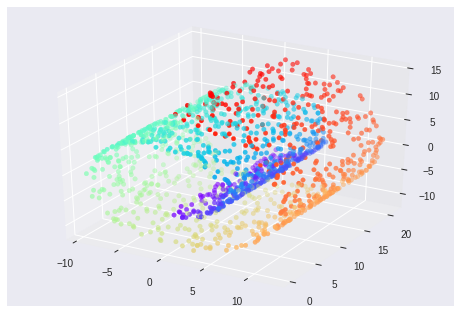

In [0]:
from sklearn.datasets import make_swiss_roll
#from sklearn.datasets.samples_generator import make_swiss_roll
X_swiss, color = make_swiss_roll(n_samples=1500)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# for visualization purpose we will affect the same
# color for each class
ax.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2],c=color,marker='o',cmap="rainbow")
plt.show()

In [0]:
from sklearn import manifold
X_r, err = manifold.locally_linear_embedding(X_swiss, n_neighbors=12,
                                            n_components= 2)
                                         

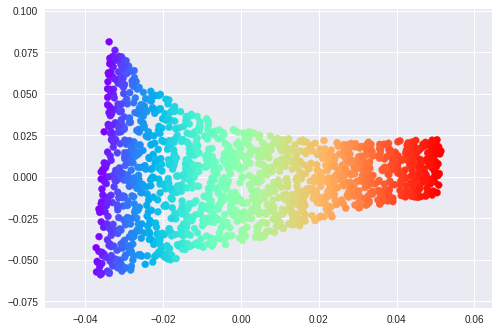

In [0]:
plt.scatter(X_r[:,0],X_r[:,1],c=color, cmap = plt.cm.rainbow)

# 6- 5- Manifold Learning: MDS

## Concept

* There are two types of **Multidimensional Scaling**: **classical ** (or **metric**) that tries to reproduce the original distances. The second one is **non-metric** (**NMDS**) that tries to reproduces only the rank of the distances.
* We will describe the algorithm of the classical method using the euclidean distance:
  * Compute the distances between all points, and form a matrix of those distances in a matrix $D$.
  * Compute the matrix $A$ as follow: $A(i,j) = - \frac {1}{2} \cdot D(i,j)^2$
  * Compute the matrix $B$ as follow:$ B(i,j)= A(i,j)- A(i,.) - A(.,j) +A(.,.)$
> where: 
>> $A(i,.) $is the average of all $A(i,j)$ for a selected $i$
>> $A(.,j)$ is the average of all $A(.,j)$ for a selected $ j$
>> $A(.,.) $is the average of all values of$ A$
  * Find the $p$ (the **new dimension**, **lesser** than the original dimension )  largest eigenvalues of $B$: $\lambda_1,\lambda_2,...,\lambda_p$
 and their corresponding normalized eigenvectors  $L_1,L_2, …, L_p$  so that $L_i^T . Li = \lambda_i$

  * Form the matrix L as follow:$ L = (L1, L2, …, Lp)$. The new values (coordinates) are the rows of $L$.

* This method minimizes the value of the **Stress**
* The  stress is a measure that can be used to find the optimal lower dimension. It is computed as follow:
 

> stress = $\sqrt \frac {\sum _{i<j}{(D(i,j) -  \Delta(i,j))^2 }}{\sum_ {i<j} {D(i,j)^2}}$




>> where:   $\Delta$        is the matrix of the distances of the new 	matrix  $L$

  * A stress with a value $< 0.05$ is acceptable,  below $0.01$ is considered to be good.
     

## Example

In [0]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed_mds = embedding.fit_transform(X_swiss)


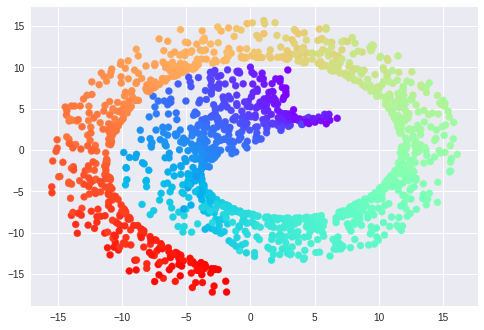

In [0]:
plt.scatter(X_transformed_mds[:,0],X_transformed_mds[:,1],c=color, cmap = plt.cm.rainbow)

# References

* Aurélien Géron. Hands-on machine learning with Scikit-Learn and Tensor-Flow: concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc, 2017.
* J. D. Hunter. Matplotlib: A 2d graphics environment. Computing In Science & Engineering, 9(3):90–95, 2007.
* NCSS Statistical Software. Multidimensional Scaling, ncss, llc edition.
* Scikit-learn.org. scikit-learn, machine learning in python. On-line at https://scikit-learn.org/stable/. Accessed on 03-11-2018.
* Jake VanderPlas. Python data science handbook: essential tools for working with data. O’Reilly Media, Inc, 2017.
* web.mit.edu. Singular value decomposition (svd) tutorial. On-line at https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm. Accessed on 28-12-2018.
* wikipedia.org. Wikipedia, the free encyclopedia. On-line at https://www.wikipedia.org/. Accessed on 25-12-2018.
